<a href="https://colab.research.google.com/github/Narawit007/BSC_DPDM2025/blob/main/CH3_Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
flood = pd.read_csv('/content/drive/MyDrive/BSC_data 2026/flooding database.csv')
flood.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


# Data Cleaning

## Missing Data

In [ ]:
flood.isnull().any()

,0
system:index,False
index,False
threshold_type,False
glide_index,True
dfo_country,False
dfo_other_country,True
dfo_centroid_x,False
dfo_centroid_y,False
dfo_began,False
dfo_ended,True


In [ ]:
flood.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### drop record ที่มี missing ออก

### check missing data

### Drop record ที่มี missing ออก

drop ถ้ามี missing

In [ ]:
flood.shape

(913, 23)

In [ ]:
flood_drop1 = flood.dropna()
flood_drop1.shape

(13, 23)

drop เฉพาะเกิด missing ในตัวแปรที่เราจะใช้

-dfo_country

-dfo_other_country

-dfo_began

-dfo_ended

-dfo_dead

-dfo_cause

-dfo_severity

In [ ]:
flood_drop2 = flood.dropna(subset = ['dfo_country', 'dfo_other_country', 'dfo_began',
                                        'dfo_ended', 'dfo_dead', 'dfo_cause', 'dfo_severity'])
flood_drop2.shape

(637, 23)

In [ ]:
flood_drop2.head()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0


### เติม dummy

In [ ]:
flood[flood.isnull()['dfo_other_country']]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
172,DFO_2415_From_20040110_to_20040119,2415,std,0,Iran,NaN,51.439491,29.466641,1/10/04,1/19/04,...,Heavy rain,1.0,7017.61,23986.0,23986.0,116060,1,0,-92074,NaN
383,DFO_3089_From_20070530_to_20070603,3089,std,0,Dominican Republic,NaN,-71.053795,19.547861,5/30/07,6/3/07,...,Heavy rain,1.0,100.92,13819.0,13819.0,11672,1,0,2147,NaN
387,DFO_3097_From_20070611_to_20070624,3097,std,LS-2007-000080-BGD,Bangladesh,NaN,91.953546,22.397464,6/11/07,6/24/07,...,Heavy rain,1.0,20493.38,4536692.0,4536692.0,8995159,1,0,-4458467,NaN
412,DFO_3136_From_20070721_to_20071015,3136,std,0,Bangladesh,NaN,91.233643,23.916419,7/21/07,10/15/07,...,Heavy rain,1.0,78785.53,27712991.0,27712998.0,55288622,0,-7,-27575631,NaN
428,DFO_3166_From_20070726_to_20071010,3166,std,FL-2007-000132-BFA,Ghana,NaN,0.612005,13.037658,7/26/07,10/10/07,...,Heavy rain,1.5,7621.96,325408.0,325408.0,624312,1,0,-298904,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,DFO_4683_From_20180901_to_20181002,4683,std,NaN,Ghana,NaN,-1.066060,9.537550,9/1/18,10/2/18,...,Dam,1.5,1866.91,79032.0,38895.0,79032,1,40137,0,NaN
909,DFO_4695_From_20181023_to_20181027,4695,std,NaN,Mexico,NaN,-105.236000,23.721800,10/23/18,10/27/18,...,"Tropical Storm, Surge",1.5,2720.37,23128.0,15725.0,23128,1,7403,0,NaN
910,DFO_4703_From_20181029_to_20181107,4703,otsu,NaN,Paraguay,NaN,-57.085300,-25.342700,10/29/18,11/7/18,...,Heavy rain,1.0,10019.87,29435.0,25393.0,29435,1,4042,0,NaN
911,DFO_4704_From_20181124_to_20181129,4704,std,NaN,Vietnam,NaN,107.137000,11.491000,11/24/18,11/29/18,...,"Tropical Storm, Surge",1.0,6467.41,218916.0,173753.0,218915,0,45163,1,NaN


In [ ]:
flood[~flood.isnull()['dfo_other_country']]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_cause,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
0,DFO_1586_From_20000218_to_20000301,1586,otsu,0,Australia,0,143.697800,-31.268059,2/18/00,3/1/00,...,Heavy rain,2.0,316.73,38.0,38.0,43,1,0,-5,NaN
1,DFO_1587_From_20000217_to_20000311,1587,otsu,0,Madagascar,0,47.295670,-15.782624,2/17/00,3/11/00,...,"Tropical Storm, Surge",1.0,228.50,4594.0,4594.0,6855,1,0,-2261,NaN
2,DFO_1595_From_20000405_to_20000425,1595,otsu,0,Romania,Hungary,22.415404,46.763746,4/5/00,4/25/00,...,"Snowmelt, Ice, Rain",2.0,89.10,3093.0,3093.0,4618,1,0,-1525,NaN
3,DFO_1614_From_20000711_to_20000810,1614,otsu,0,Thailand,Vietnam,105.063841,11.242567,7/11/00,8/10/00,...,Heavy rain,1.0,4322.47,544758.0,544758.0,658643,1,0,-113885,NaN
4,DFO_1627_From_20000830_to_20000910,1627,otsu,0,China,Russia,132.057679,43.773883,8/30/00,9/10/00,...,"Tropical Storm, Surge",1.0,740.33,785363.0,785363.0,766309,1,0,19054,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,DFO_4516_From_20170908_to_20170919,4516,std,TC-2017-000132-CUB,USA,Cuba,-81.625156,28.594245,9/8/17,9/19/17,...,"Tropical Storm, Surge",2.0,9990.79,108896.0,92345.0,108883,0,16551,13,NaN
886,DFO_4581_From_20180310_to_20180314,4581,std,NaN,Croatia,Bosnia and Herzegovina,16.947210,44.734938,3/10/18,3/14/18,...,"Snowmelt, Ice, Rain",1.0,1564.28,53495.0,50783.0,53495,1,2712,0,NaN
893,DFO_4597_From_20180325_to_20180408,4597,std,NaN,Greece,Bulgaria,26.671405,41.531705,3/25/18,4/8/18,...,Heavy rain,1.5,2818.83,57706.0,51639.0,57706,1,6067,0,NaN
897,DFO_4640_From_20180625_to_20180711,4640,std,NaN,India,Pakistan,75.143900,33.375200,6/25/18,7/11/18,...,Heavy rain,1.0,2104.94,224236.0,60172.0,224236,1,164064,0,NaN


In [ ]:
flood_filldummy = flood.fillna(value = {'dfo_other_country' : 'Unknown'})

In [ ]:
flood_filldummy.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,0
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### เติม ด้วยค่ากลาง

In [ ]:
flood.groupby('dfo_cause').count()

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,dfo_displaced,dfo_severity,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000
dfo_cause,,,,,,,,,,,,,,,,,,,,,
Dam,13,13,13,11,13,10,13,13,13,13,...,13,13,13,13,13,13,13,13,13,0
Heavy rain,749,749,749,554,749,530,749,749,749,748,...,749,749,749,748,748,749,749,749,749,16
"Snowmelt, Ice, Rain",52,52,52,45,52,45,52,52,52,52,...,52,52,52,52,52,52,52,52,52,7
"Tropical Storm, Surge",97,97,97,71,97,53,97,97,97,97,...,97,97,97,97,97,97,97,97,97,1


In [ ]:
flood_fillmode = flood.fillna(value = {'dfo_cause' : 'Heavy rain'})

In [ ]:
flood_fillmode.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


### เติม ด้วยตัวแทนของกลุ่ม

In [ ]:
flood.groupby(['dfo_severity', 'dfo_cause']).count()

system:index  index  threshold_type  \
dfo_severity dfo_cause                                                    
1.0          Dam                               9      9               9   
             Heavy rain                      464    464             464   
             Snowmelt, Ice, Rain              34     34              34   
             Tropical Storm, Surge            33     33              33   
1.5          Dam                               3      3               3   
             Heavy rain                      163    163             163   
             Snowmelt, Ice, Rain               8      8               8   
             Tropical Storm, Surge            26     26              26   
2.0          Dam                               1      1               1   
             Heavy rain                      122    122             122   
             Snowmelt, Ice, Rain              10     10              10   
             Tropical Storm, Surge            38     38              38   

                                    glide_index  dfo_country  \
dfo_severity dfo_cause                                         
1.0          Dam                              9            9   
             Heavy rain                     390          464   
             Snowmelt, Ice, Rain             29           34   
             Tropical Storm, Surge           32           33   
1.5          Dam                              1            3   
             Heavy rain                      72          163   
             Snowmelt, Ice, Rain              7            8   
             Tropical Storm, Surge           12           26   
2.0          Dam                              1            1   
             Heavy rain                      92          122   
             Snowmelt, Ice, Rain              9           10   
             Tropical Storm, Surge           27           38   

                                    dfo_other_country  dfo_centroid_x  \
dfo_severity dfo_cause                                                  
1.0          Dam                                    9               9   
             Heavy rain                           369             464   
             Snowmelt, Ice, Rain                   30              34   
             Tropical Storm, Surge                 28              33   
1.5          Dam                                    0               3   
             Heavy rain                            67             163   
             Snowmelt, Ice, Rain                    6               8   
             Tropical Storm, Surge                  7              26   
2.0          Dam                                    1               1   
             Heavy rain                            94             122   
             Snowmelt, Ice, Rain                    9              10   
             Tropical Storm, Surge                 18              38   

                                    dfo_centroid_y  dfo_began  dfo_ended  ...  \
dfo_severity dfo_cause                                                    ...   
1.0          Dam                                 9          9          9  ...   
             Heavy rain                        464        464        463  ...   
             Snowmelt, Ice, Rain                34         34         34  ...   
             Tropical Storm, Surge              33         33         33  ...   
1.5          Dam                                 3          3          3  ...   
             Heavy rain                        163        163        163  ...   
             Snowmelt, Ice, Rain                 8          8          8  ...   
             Tropical Storm, Surge              26         26         26  ...   
2.0          Dam                                 1          1          1  ...   
             Heavy rain                        122        122        122  ...   
             Snowmelt, Ice, Rain                10         10         10  ...   
            

In [ ]:
flood_sever1 = flood[flood['dfo_severity'] == 1.0]
flood_sever15 = flood[flood['dfo_severity'] == 1.5]
flood_sever2 = flood[flood['dfo_severity'] == 2.0]

In [ ]:
flood_fillgroup1 = flood_sever1.fillna({'dfo_cause' : 'Heavy rain'})
flood_fillgroup15= flood_sever15.fillna({'dfo_cause' : 'Heavy rain'})
flood_fillgroup2 = flood_sever2.fillna({'dfo_cause' : 'Tropical Storm, Surge'})

In [ ]:
flood_fillgroup = pd.concat([flood_fillgroup1, flood_fillgroup15, flood_fillgroup2])

In [ ]:
flood_fillgroup.isnull().sum()

,0
system:index,0
index,0
threshold_type,0
glide_index,232
dfo_country,0
dfo_other_country,275
dfo_centroid_x,0
dfo_centroid_y,0
dfo_began,0
dfo_ended,1


## Noisy Data

In [ ]:
flood['gfd_area']

,gfd_area
0,316.73
1,228.50
2,89.10
3,4322.47
4,740.33
...,...
908,1866.91
909,2720.37
910,10019.87
911,6467.41


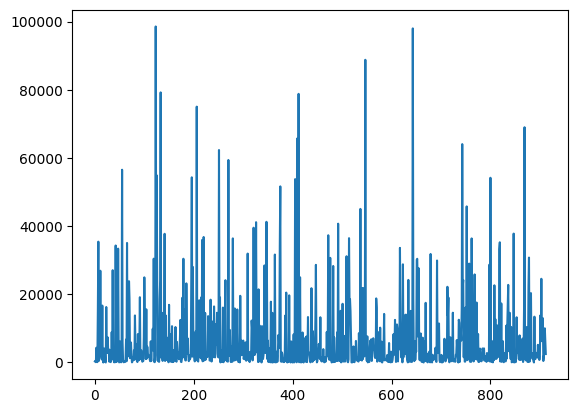

In [ ]:
import matplotlib.pyplot as plt
plt.plot(flood['gfd_area'])

ใช้histogram ดู Bin ที่เหมาะสม

(array([781.,  75.,  38.,   7.,   6.,   3.,   3.]),
 array([    0.        , 14078.23142857, 28156.46285714, 42234.69428571,
        56312.92571429, 70391.15714286, 84469.38857143, 98547.62      ]),
 <BarContainer object of 7 artists>)

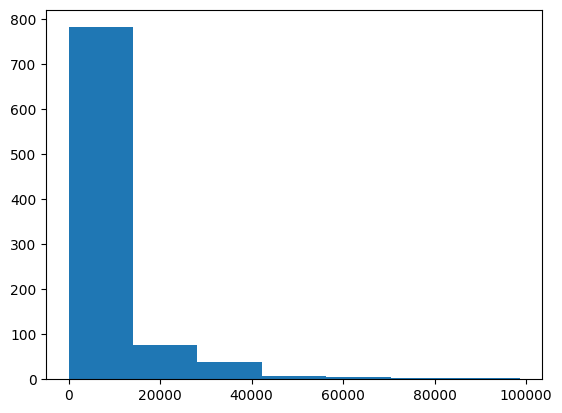

In [ ]:
plt.hist(flood['gfd_area'], 7)

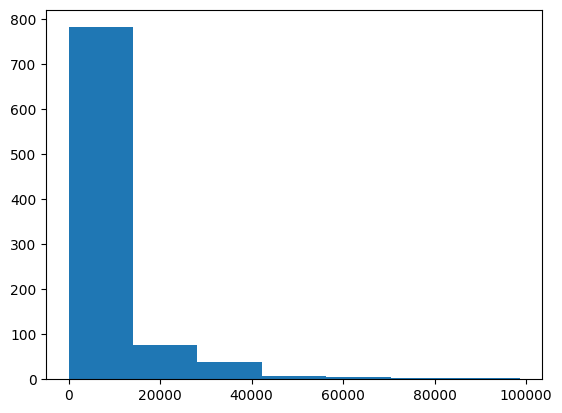

In [ ]:
outputhist = plt.hist(flood['gfd_area'], 7)

In [ ]:
outputhist[1]

array([    0.        , 14078.23142857, 28156.46285714, 42234.69428571,
       56312.92571429, 70391.15714286, 84469.38857143, 98547.62      ])

In [ ]:
def assign_gfd_area_bins(gfd_area_series, bin_edges):
    # Using pd.cut to categorize the 'gfd_area' values into the predefined bins
    # `include_lowest=True` ensures that the lowest value is included in the first bin
    return pd.cut(gfd_area_series, bins=bin_edges, include_lowest=True)

# Apply the function to the 'gfd_area' column and store the result in a new column
flood['gfd_area_bin'] = assign_gfd_area_bins(flood['gfd_area'], outputhist[1])

# Display the first few rows with the new column
print(flood[['gfd_area', 'gfd_area_bin']].head())

   gfd_area         gfd_area_bin
0    316.73  (-0.001, 14078.231]
1    228.50  (-0.001, 14078.231]
2     89.10  (-0.001, 14078.231]
3   4322.47  (-0.001, 14078.231]
4    740.33  (-0.001, 14078.231]


In [ ]:
def put_value_into_bins(value,bin_edge):
  for i in range(len(bin_edge)-1):
    if value >= bin_edge[1] and value < bin_edge[i+1]:
      new_val = bin_edge[i]+(bin_edge[i+1]-bin_edge[i])/2
      return new_val

In [ ]:
put_value_into_bins(7000,outputhist[1])

In [ ]:
flood['gfd_area bin']= flood['gfd_area'].apply(lambda x: put_value_into_bins(x,outputhist[1]))

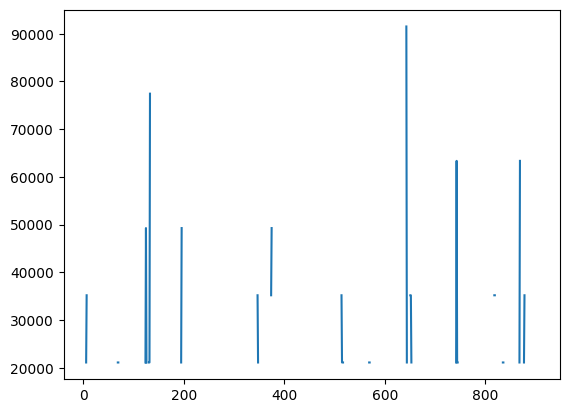

In [ ]:
plt.plot(flood['gfd_area bin'])

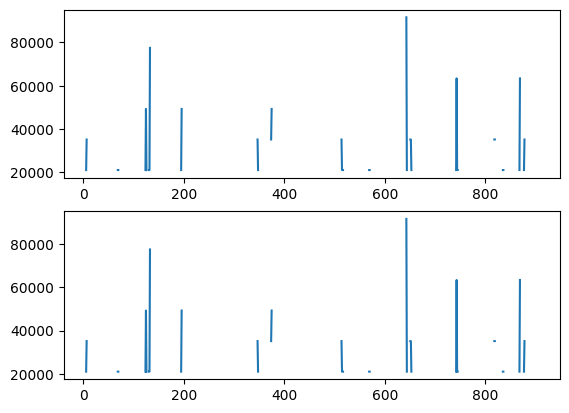

In [ ]:
plt.subplot(2,1,1)
plt.plot(flood['gfd_area bin'])
plt.subplot(2,1,2)
plt.plot(flood['gfd_area bin'])

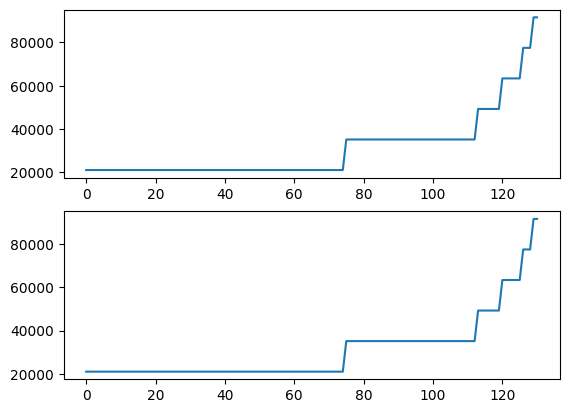

In [ ]:
plt.subplot(2,1,1)
plt.plot(flood['gfd_area bin'].sort_values().reset_index(drop=True))
plt.subplot(2,1,2)
plt.plot(flood['gfd_area bin'].sort_values().reset_index(drop=True))

## Outlier Removal

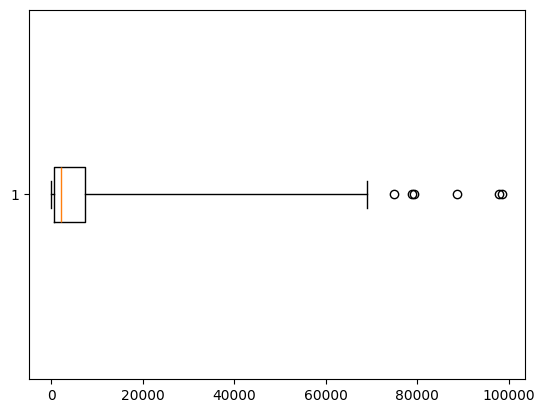

In [ ]:
outputbox = plt.boxplot(flood['gfd_area'],vert=False,whis=10);

In [ ]:
outputbox

{'whiskers': [<matplotlib.lines.Line2D at 0x7badd03a8cb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7badd03a92b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7badd0383dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7badd03a9880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7badd03a9b50>],
 'means': []}

In [ ]:
outputbox['whiskers'][0].get_xdata()

array([608.6,   0. ])

In [ ]:
outputbox['whiskers'][1].get_xdata()

array([ 7354.55, 68991.93])

In [ ]:
outputbox['fliers'][0].get_xdata()

array([98547.62, 79213.43, 75030.8 , 78785.53, 88773.57, 97982.77])

remove outliers

In [ ]:
flood_nooutlier = flood[flood['gfd_area']<outputbox['whiskers'][1].get_xdata()[1]]

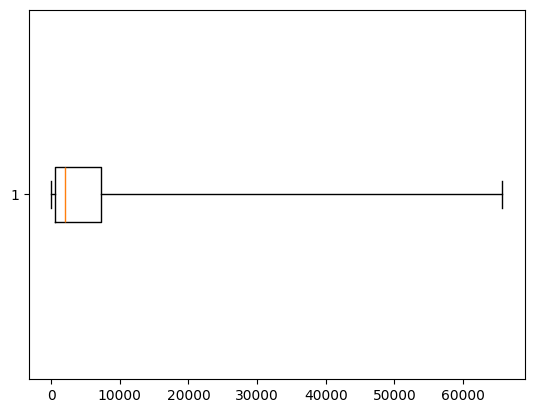

In [ ]:
outputbox2 = plt.boxplot(flood_nooutlier['gfd_area'],vert=False,whis=10);

ตามหาค่า outliers

In [ ]:
flood[flood['gfd_area'] == outputbox['fliers'][0].get_xdata()[0]]

,system:index,index,threshold_type,glide_index,dfo_country,dfo_other_country,dfo_centroid_x,dfo_centroid_y,dfo_began,dfo_ended,...,gfd_area,gfd_exp_ghsl_ts,gfd_exp_ghsl_2000,gfd_exp_ghsl_2015,Errors,dif 2000,dif 2015,error 2000,gfd_area_bin,gfd_area bin
123,DFO_2208_From_20030416_to_20030528,2208,std,0,Russia,0,64.739289,55.453563,4/16/03,5/28/03,...,98547.62,1014245.0,1014245.0,931108,1,0,83137,1.0,"(84469.389, 98547.62]",NaN


# Data Integration

Data exploration

In [ ]:
project_df = pd.read_csv('/content/drive/MyDrive/BSC_data 2026/Copy of opendata_project-2.csv')
project_df.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
1,4268.0,project_15905,Liberty Park 2,ลิเบอร์ตี้ พาร์ค 2,2,Condo,คอนโด,6500000.0,developer_10510,NaN,...,0.0,0.0,1.0,1.0,2019-06-28 16:06:45,1998-12-31 07:00:00,2020-12-04 10:39:27,baania,https://baania.com/th/project/ลิเบอร์ตี้-พาร์ค...,2023-06-11
2,5849.0,62b2b082cb0d2c0014be01a6,Pleno Paholyothin-Saimai 2,พลีโน่ พหลโยธิน-สายไหม 2,3,Townhome,ทาวน์โฮม,2790000.0,developer_1760,"AP (THAILAND) PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-06-22 13:02:42,2024-01-01 07:00:00,2023-03-20 15:00:04,baania,https://baania.com/th/project/พลีโน่-พหลโยธิน-...,2023-06-11
3,21762.0,project_6010,Baan Thara Rin,บ้านธารารินทร์,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-04-19 14:41:10,NaN,2022-11-07 12:30:02,baania,https://baania.com/th/project/บ้านธารารินทร์-p...,2023-06-11
4,10751.0,project_11312,The Forest Hill,เดอะ ฟอเรสต์ ฮิลล์,1,Detached House,บ้าน,2450000.0,developer_7313,"Cholsiri Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2017-10-30 14:10:50,2018-12-31 07:00:00,2022-08-15 16:00:05,baania,https://baania.com/th/project/เดอะ-ฟอเรสต์-ฮิล...,2023-06-11


In [ ]:
unit_df = pd.read_csv('/content/drive/MyDrive/BSC_data 2026/Copy of opendata_unittype-2.csv')
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,1.0,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11


In [ ]:
for i in project_df.columns:
  print(i)

row_number
project_id
name_en
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
price_min
developer_id
developer_name_en
developer_name_th
latitude
longitude
neighborhood_id
neighborhood_name_en
neighborhood_name_th
subdistrict_id
subdistrict_name_en
subdistrict_name_th
district_id
district_name_en
district_name_th
province_id
province_name_en
province_name_th
zipcode
count_elevator
count_elevator_service
count_floor
count_parking
count_tower
count_unit
count_unittype
facility_clubhouse
facility_fitness
facility_meeting
facility_park
facility_playground
facility_pool
facility_security
date_created
date_finish
date_updated
source
url_project
day


In [ ]:
for i in unit_df.columns:
  print(i)

row_number
unittype_id
project_id
name_th
propertytype_id
propertytype_name_en
propertytype_name_th
area_total_min_wa
area_usable_min
price_min
count_airconditioner
count_elevator
count_floor_internal
count_parking
count_room_bath
count_room_bed
count_room_dinning
count_room_guest
count_room_kitchen
count_room_living
count_room_maid
count_room_storage
count_room_utility
date_created
date_updated
source
url_unittype
day


## Add more columns to the table (X-Data Integration)
'''map'''

In [ ]:
unit_df['project_id'].map(project_df.set_index)('project_id')['name_th','developer_name_th','neighborhood_name_th',
                                                   'subdistrict_name_th','district_name_th','province_name_th']

In [ ]:
unit_df['project_id'].map(project_df.set_index('project_id')['name_th'])

## Deduplication

ดูก่อนว่า Data มัน Duplicate ยังไง

In [ ]:
project_df.duplicated().any()

In [ ]:
project_df.duplicated(keep=False).sum()

In [ ]:
project_df[project_df.duplicated()]

In [ ]:
project_df[project_df.duplicated(subset = ['project_id'])]

In [ ]:
project_df[project_df.duplicated(keep=False)]

In [ ]:
project_df.duplicated(subset=['project_id'], keep=False).sum()

In [ ]:
project_df[projrct_df.duplicated(subset=)]

In [ ]:
project_df[project_df.duplicated(subset=['project_id'], keep=False).head(20)

ลบข้อมูลที่มี project_id ซ้ำกัน
โดยเก็บไว้เฉพาะตัวที่เป็นข้อมูลล่าสุด (ตัวล่าง)

In [ ]:
project_df_dedup = project_df.drop_duplicates(subset=['project_id'],keep='last')

map data ที่ไม่มี

In [ ]:
unit_df['project_id'].map(project_df_dedup.set_index('project_id')['name_th'])

In [ ]:
unit_df['ชื่อโครงการ'] = unit_df['project_id'].map(project_df_dedup.set_index('project_id')['name_th'])

# HW3 กลับไปเติมข้อมูล Columns ที่จำเป็นที่เหลือ
developer_name_th, neighborhood_name_th,

In [63]:
cols = {
    'name_th': 'ชื่อโครงการ',
    'developer_name_th': 'ผู้พัฒนา',
    'neighborhood_name_th': 'ย่าน',
    'subdistrict_name_th': 'ตำบล',
    'district_name_th': 'อำเภอ',
    'province_name_th': 'จังหวัด'
}

unit_df = unit_df.drop(columns=list(cols.values()), errors='ignore')

unit_df = unit_df.join(
    project_df_dedup.set_index('project_id')[list(cols.keys())].rename(columns=cols),
    on='project_id'
)


## Data Transformation

## Coiumn Alignment

## Add Data source Column